In [130]:
import matplotlib.pyplot as plt
import seaborn as sns


In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv('world_data_nonull.csv')

pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,Unnamed: 0.1,country,density,abbreviation,agricultural_land(_%),land_area,armed_forces_size,calling_code,capital/major_city,cpi,cpi_change_,currency-code,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,largest_city,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,continent,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
0,0,0,Afghanistan,60.0,AF,58.1,652.23,323.0,93.0,Kabul,149.9,2.3,AFN,2.1,0.7,19101353833.0,104.0,9.7,Kabul,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.93911,67.709953,Asia,32.49,8.672,4.47,47.9,64.50,638.0
1,1,1,Albania,105.0,AL,43.1,28.748,9.0,355.0,Tirana,119.05,1.4,ALL,28.1,1.36,15278077447.0,107.0,55.0,Tirana,1.12,Albanian,56.9,1.2,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe,11.78,4.536,1.62,7.8,78.50,15.0
2,2,2,Algeria,18.0,DZ,17.4,Unknown,317.0,213.0,Algiers,151.36,2.0,DZD,0.8,0.28,169988236398.0,109.9,51.4,Algiers,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.7,31510100.0,28.033886,1.659626,Africa,24.28,150.006,3.02,20.1,76.70,112.0
3,3,3,Andorra,164.0,AD,40.0,468.0,Unknown,376.0,Andorra la Vella,Unknown,Unknown,EUR,34.0,1.51,3154057987.0,106.4,Unknown,Andorra la Vella,6.63,Catalan,36.4,3.33,77142.0,Unknown,Unknown,NaN,Unknown,67873.0,42.506285,1.521801,Europe,7.20,469.000,1.27,2.7,79.56,26.0
4,4,4,Angola,26.0,AO,47.5,Unknown,117.0,244.0,Luanda,261.73,17.1,AOA,46.3,0.97,94635415870.0,113.5,9.3,Luanda,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa,40.73,34.693,5.52,51.6,60.80,241.0


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

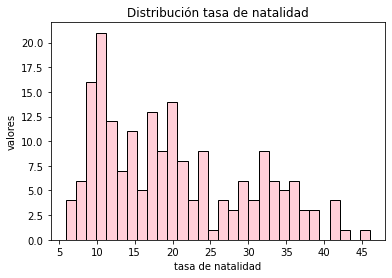

In [133]:
sns.histplot(x='birth_rate', data = df, bins=30, color='pink')
plt.xlabel('tasa de natalidad')
plt.ylabel('valores')
plt.title('Distribución tasa de natalidad');


La tasa de natalidad mayor está entre 10 y 12

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

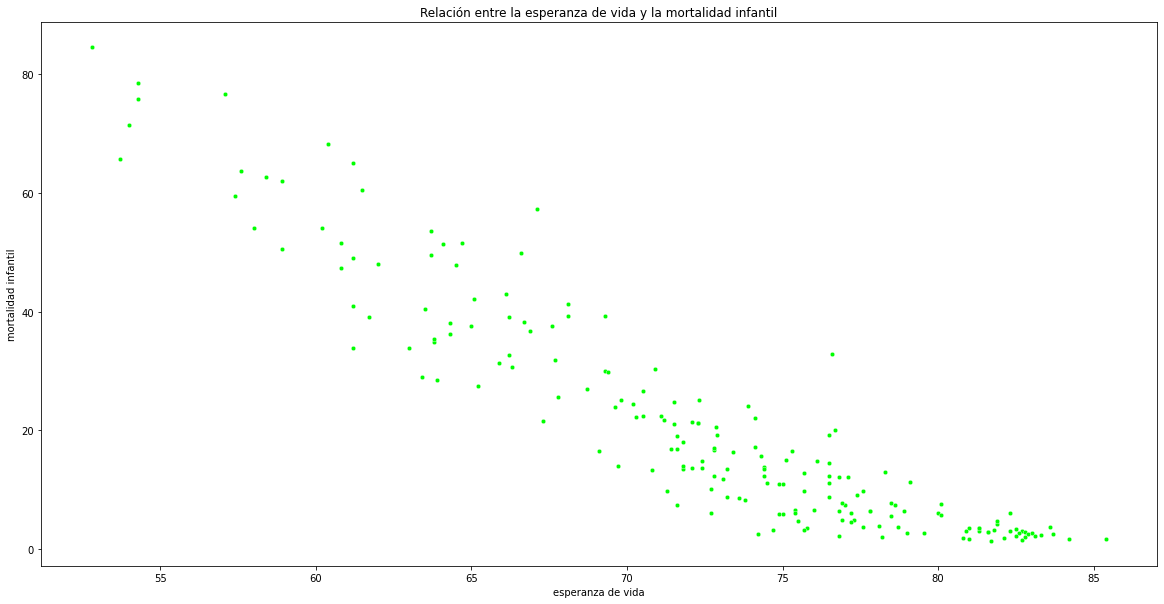

In [134]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = 'life_expectancy', y='infant_mortality', data = df, color = 'lime', s = 20)
plt.xlabel('esperanza de vida')
plt.ylabel('mortalidad infantil')
plt.title('Relación entre la esperanza de vida y la mortalidad infantil');
# Aumentamos el tamaño de los puntos para que sea legible

Según los datos obtenidos, observamos que cuanto más alta es la esperanza de vida, es menor la mortalidad infantil. 

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

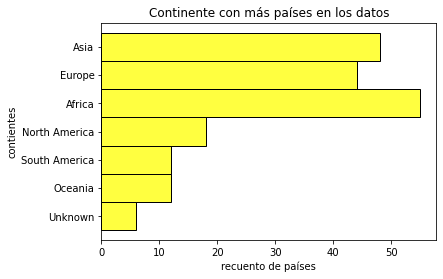

In [135]:
sns.histplot(y='continent', data = df, bins=30, color='yellow')
plt.ylabel('contientes')
plt.xlabel('recuento de países')
plt.title('Continente con más países en los datos');

In [136]:
df_continente = df.groupby("continent")["Unnamed: 0"].count().reset_index()
df_continente

,continent,Unnamed: 0
0,Africa,55
1,Asia,48
2,Europe,44
3,North America,18
4,Oceania,12
5,South America,12
6,Unknown,6


''

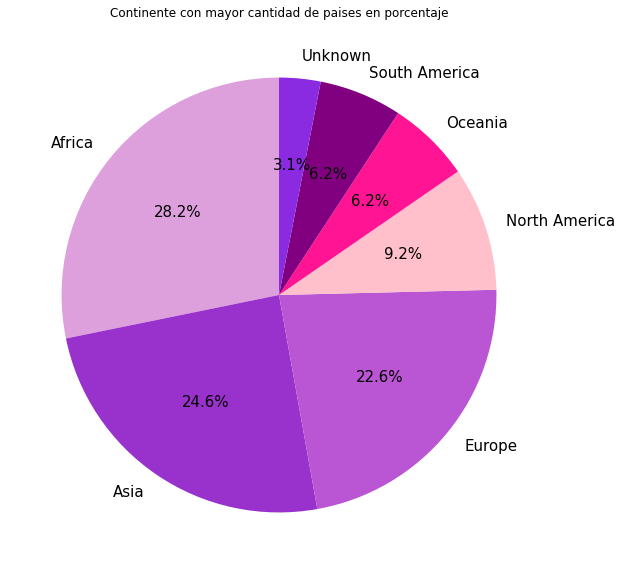

In [137]:
plt.figure(figsize=(20, 10))
colores = ["plum", "darkorchid", "mediumorchid", "pink", "deeppink", "purple","blueviolet"]

plt.pie("Unnamed: 0", labels= "continent",
        data = df_continente, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 15}, 
        startangle=90)
plt.title('Continente con mayor cantidad de paises en porcentaje')
;

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [138]:
europe = df['continent'] == 'Europe'
df_europe = df[europe]
df_europe.head()

,Unnamed: 0,Unnamed: 0.1,country,density,abbreviation,agricultural_land(_%),land_area,armed_forces_size,calling_code,capital/major_city,cpi,cpi_change_,currency-code,forested_area_,gasoline_price,gdp,gross_primary_education_enrollment_,gross_tertiary_education_enrollment_,largest_city,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation_,tax_revenue_,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,continent,birth_rate,co2-emissions,fertility_rate,infant_mortality,life_expectancy,maternal_mortality_ratio
1,1,1,Albania,105.0,AL,43.1,28.748,9.0,355.0,Tirana,119.05,1.4,ALL,28.1,1.36,15278077447.0,107.0,55.0,Tirana,1.12,Albanian,56.9,1.2,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe,11.78,4.536,1.62,7.8,78.50,15.0
3,3,3,Andorra,164.0,AD,40.0,468.0,Unknown,376.0,Andorra la Vella,Unknown,Unknown,EUR,34.0,1.51,3154057987.0,106.4,Unknown,Andorra la Vella,6.63,Catalan,36.4,3.33,77142.0,Unknown,Unknown,NaN,Unknown,67873.0,42.506285,1.521801,Europe,7.20,469.000,1.27,2.7,79.56,26.0
9,9,9,Austria,109.0,AT,32.4,83.871,21.0,43.0,Vienna,118.06,1.5,EUR,46.9,1.2,446314739528.0,103.1,85.1,Vienna,Unknown,German,17.9,5.17,8877067.0,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072,Europe,9.70,61.448,1.47,2.9,81.60,5.0
15,15,15,Belarus,47.0,BY,42.0,207.6,155.0,375.0,Minsk,Unknown,5.6,BYN,42.6,0.6,63080457023.0,100.5,87.4,Minsk,1.49,Russian,34.5,5.19,9466856.0,64.1,14.7,53.3,4.59,7482982.0,53.709807,27.953389,Europe,9.90,58.280,1.45,2.6,74.20,2.0
16,16,16,Belgium,383.0,BE,44.6,30.528,32.0,32.0,City of Brussels,117.11,1.4,EUR,22.6,1.43,529606710418.0,103.9,79.7,Brussels,10.31,French,17.6,3.07,11484055.0,53.6,24.0,55.4,5.59,11259082.0,50.503887,4.469936,Europe,10.30,96.889,1.62,2.9,81.60,5.0


Text(0.5, 1.0, 'Datos esperanza de vida')

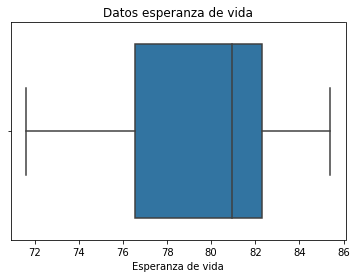

In [139]:
sns.boxplot(data=df_europe, x='life_expectancy')
plt.xlabel('Esperanza de vida')
plt.title('Datos esperanza de vida')

- No existen valores atipicos.
- La mediana se encuentra entorno al 81.

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

In [140]:
df['urban_population'] = pd.to_numeric(df['urban_population'], errors='coerce')

''

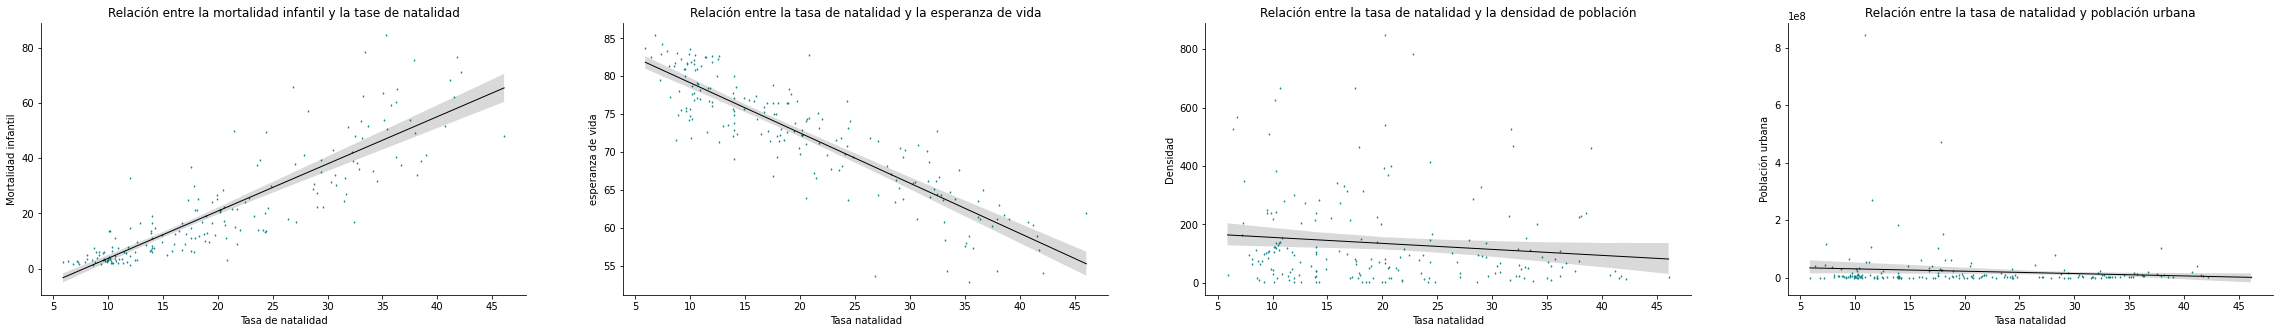

In [141]:

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (40, 5))

#TASA NATALIDADD Y MORTALIDAD INFANTIL
sns.regplot(x = "birth_rate", y = "infant_mortality", data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, 
            scatter_kws = {"color": "teal", "s": 1}, 
            ax = axes[0]  
            )

axes[0].set_title("Relación entre la mortalidad infantil y la tase de natalidad") 
axes[0].set_xlabel("Tasa de natalidad")
axes[0].set_ylabel("Mortalidad infantil")
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

#TASA NATALIDAD Y ESPERANZA DE VIDA
sns.regplot(x = "birth_rate", y = "life_expectancy", data = df, 
                 marker = "d", 
                line_kws = {"color": "black", "linewidth": 1}, 
                scatter_kws = {"color": "teal", "s": 1}, 
                ax = axes[1] )


axes[1].set_title("Relación entre la tasa de natalidad y la esperanza de vida")
axes[1].set_xlabel("Tasa natalidad")
axes[1].set_ylabel("esperanza de vida")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

#TASA NATALIDAD Y DENSIDAD

sns.regplot(x = "birth_rate", y = "density", data = df, 
                 marker = "d", 
                line_kws = {"color": "black", "linewidth": 1}, 
                scatter_kws = {"color": "teal", "s": 1}, 
                ax = axes[2] )


axes[2].set_title("Relación entre la tasa de natalidad y la densidad de población")
axes[2].set_xlabel("Tasa natalidad")
axes[2].set_ylabel("Densidad")
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)


#TASA NATALIDAD Y DENSIDAD

sns.regplot(x = "birth_rate", y = "urban_population", data = df, 
                 marker = "d", 
                line_kws = {"color": "black", "linewidth": 1}, 
                scatter_kws = {"color": "teal", "s": 1}, 
                ax = axes[3] )


axes[3].set_title("Relación entre la tasa de natalidad y población urbana")
axes[3].set_xlabel("Tasa natalidad")
axes[3].set_ylabel("Población urbana")
axes[3].spines['right'].set_visible(False)
axes[3].spines['top'].set_visible(False)
;
;


6. ¿Cuáles son los 10 países con la mayor área forestal?

In [142]:
df['forested_area_'] = pd.to_numeric(df['forested_area_'], errors='coerce')

Text(0.5, 1.0, 'Los 10 países con mayor área forestal')

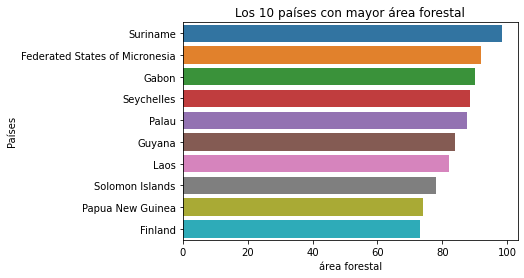

In [143]:
df_forestal =df.sort_values(by =["forested_area_"], ascending=False).head(10)
sns.barplot(data =df_forestal, x="forested_area_", y="country")
plt.xlabel('área forestal')
plt.ylabel('Países')
plt.title('Los 10 países con mayor área forestal')

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

<AxesSubplot:xlabel='birth_rate', ylabel='continent'>

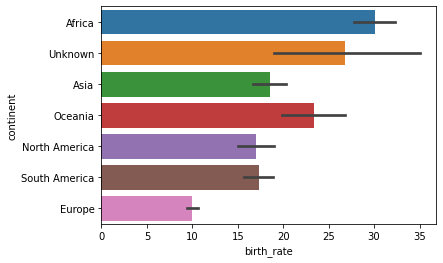

In [144]:
df_natalidad=df.sort_values(by =["birth_rate"], ascending=False)
sns.barplot(data =df_natalidad, x="birth_rate", y="continent")

8. ¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

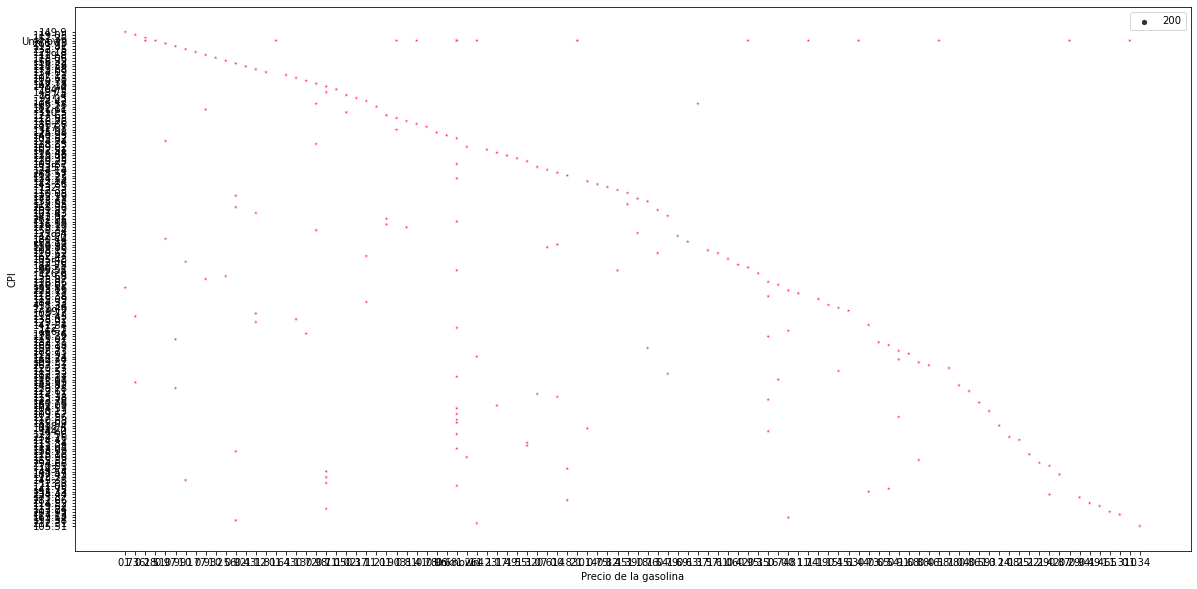

In [145]:
plt.figure(figsize=(20, 10))
sns.scatterplot(y= 'cpi' , x = 'gasoline_price', data = df, marker= "*", size = 200, 
                color = "deeppink" )
#plt.ylim([100,300])
plt.ylabel("CPI")
plt.xlabel("Precio de la gasolina");

9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

In [146]:
df_oceania = df[df['continent']=='Oceania']

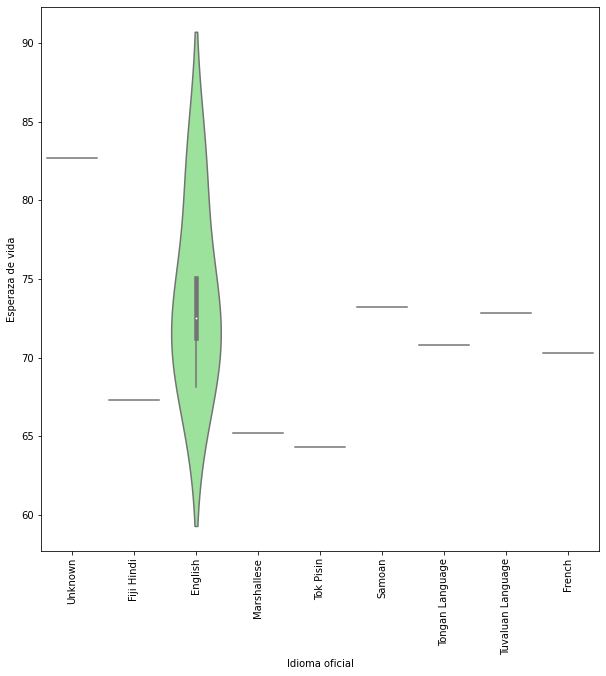

In [147]:
plt.figure(figsize=(10, 10))
sns.violinplot(x = 'official_language', y= 'life_expectancy', data = df_oceania, color = 'lightgreen')
plt.xlabel("Idioma oficial")
plt.ylabel("Esperaza de vida")
plt.xticks(rotation = 90);


10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
Un histograma de la tasa de impuestos total.
Un gráfico de barras que resuma la tasa de impuestos total por continente.

In [148]:
df['total_tax_rate']=df['total_tax_rate'].str.replace('Unknown','NaN')
df['total_tax_rate']=df['total_tax_rate'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
df_media_continente = df.groupby('continent')['total_tax_rate'].mean().reset_index()

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'density', 'abbreviation',
       'agricultural_land(_%)', 'land_area', 'armed_forces_size',
       'calling_code', 'capital/major_city', 'cpi', 'cpi_change_',
       'currency-code', 'forested_area_', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment_',
       'gross_tertiary_education_enrollment_', 'largest_city', 'minimum_wage',
       'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation_', 'tax_revenue_',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitud',
       'longitud', 'continent', 'birth_rate', 'co2-emissions',
       'fertility_rate', 'infant_mortality', 'life_expectancy',
       'maternal_mortality_ratio'],
      dtype='object')

In [ ]:
df['gdp']=df['gdp'].str.replace('Unknown','NaN')
df['gdp']=df['gdp'].astype(float)

In [ ]:
df['population']=df['population'].str.replace('Unknown','NaN')
df['population']=df['population'].astype(float)

In [ ]:
df['pib_per_capita']=df['gdp']/df['population']

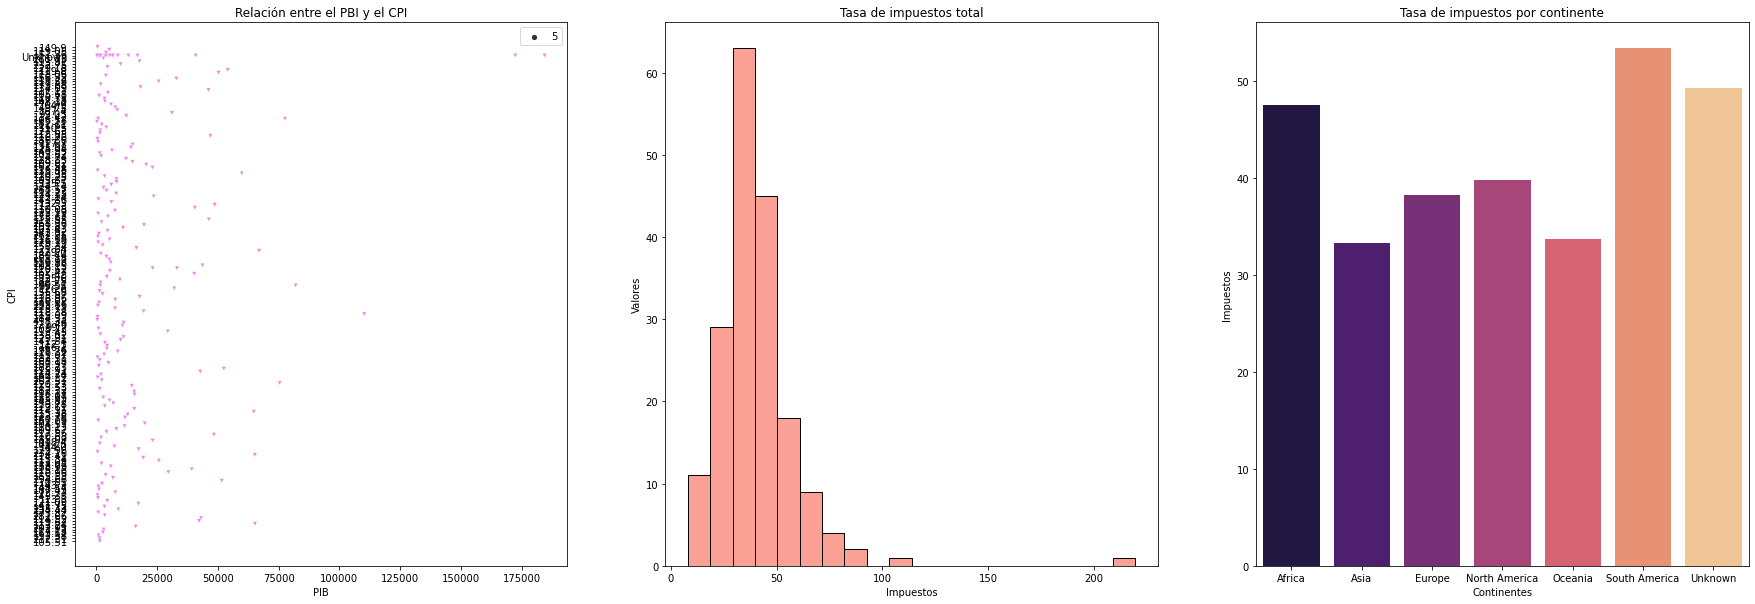

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols = 3, figsize=(30,10))
sns.scatterplot(x = "pib_per_capita", 
                y = "cpi", 
                data = df, 
                size = 5, 
                marker= "v", 
                color = "violet",
                ax= axes[0])
axes[0].set_title("Relación entre el PBI y el CPI") 
axes[0].set_xlabel("PIB")
axes[0].set_ylabel("CPI")

sns.histplot(x = "total_tax_rate", 
             data = df, 
             color = "salmon", 
             bins = 20,
             ax= axes[1] )
axes[1].set_title("Tasa de impuestos total") 
axes[1].set_xlabel("Impuestos")
axes[1].set_ylabel("Valores")


sns.barplot (x = 'continent',
             y= "total_tax_rate", 
             data = df_media_continente, 
             palette = "magma",
             ax= axes[2] )
axes[2].set_title("Tasa de impuestos por continente") 
axes[2].set_xlabel("Continentes")
axes[2].set_ylabel("Impuestos");


In [ ]:
df.to_csv('world_data_nonull.csv')